<a href="https://colab.research.google.com/github/edieski/stackoverflow_tags/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Builing the models and choosing the best

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Now that we explored our data, limited to the first tags chosen the top tags we were going to keep for this demo let's build our models*

In [ ]:
import pandas as pd


I'm starting by using our tfidf dataframe. Tfid seems to be the right choice to start because it gives more weight to more rare ngrams by downweighting it if it appears a lot in the entire corpus

In [ ]:
tfidf = pd.read_csv('drive/MyDrive/stack_overflow_NLP/tfidf.csv')


KeyboardInterrupt: ignored

In [ ]:
bow =  pd.read_csv('drive/MyDrive/stack_overflow_NLP/bow.csv')

I'm going to load our top_tags dataframe it has the body and title, tags, aswell as the title and dataframe lemitized from our preprocessing

In [ ]:
top_tags = pd.read_csv('drive/MyDrive/stack_overflow_NLP/data_with_word2vec.csv')

In [ ]:
tfidf.head()

,00,000,0000,000000,00000000,000000000,0000000000000000,000001,0001,001,...,zlib,zombie,zone,zoom,zy223zmpg6,zygoteinit,zza,zzz,äaa,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
bow.head()

,00,000,0000,000000,00000000,000000000,0000000000000000,000001,0001,001,...,zlib,zombie,zone,zoom,zy223zmpg6,zygoteinit,zza,zzz,äaa,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


# Unsupervised learning

Unsupervised learning in classification doesn't use labeled data. It finds patterns in data when labels are scarce or expensive. It aids in data exploration, preprocessing, anomaly detection, and data augmentation. It can complement supervised learning in a hybrid approach for better results. Here we are just testing it

## tfidf clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


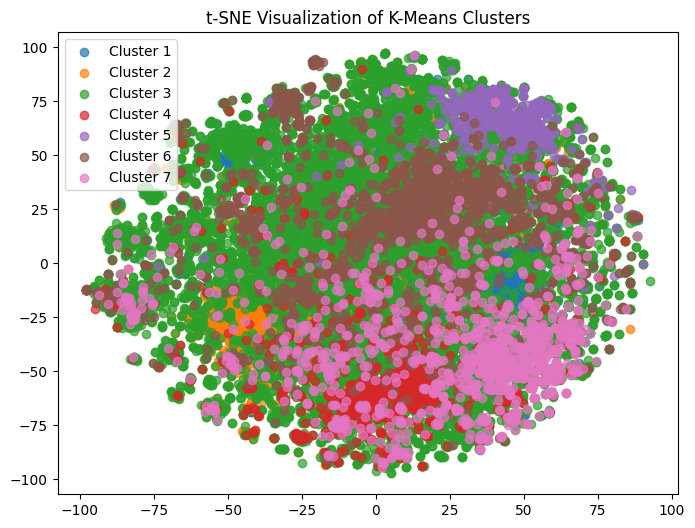

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tfidf_matrix = tfidf.values[:,:-1]
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(tfidf_matrix)

# Step 2: Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(tfidf_matrix)

# Step 3: Visualize clusters with t-SNE embeddings
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    cluster_points = tsne_embeddings[kmeans_clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}', alpha=0.7)

plt.title('t-SNE Visualization of K-Means Clusters')
plt.legend()
plt.show()

In [ ]:
terms = tfidf.columns[:-1]
for cluster_id in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[cluster_id]
    sorted_indices = cluster_center.argsort()[::-1]
    top_terms_indices = sorted_indices[:20]
    top_terms = terms[top_terms_indices]
    print(f'Cluster {cluster_id + 1}: Top 20 Words - {", ".join(top_terms)}')

Cluster 1: Top 20 Words - file, line, directory, python, py, read, java, php, path, using, way, open, folder, want, like, project, text, application, need, code
Cluster 2: Top 20 Words - class, public, method, object, int, static, foo, private, void, interface, return, type, constructor, string, new, function, name, java, property, get
Cluster 3: Top 20 Words - java, python, code, use, using, like, way, would, php, get, application, value, want, error, one, time, need, function, know, new
Cluster 4: Top 20 Words - array, list, value, element, int, item, object, way, new, key, like, length, function, var, string, index, return, python, want, two
Cluster 5: Top 20 Words - android, studio, com, app, gradle, java, project, build, layout_width, layout_height, sdk, support, error, wrap_content, view, id, google, match_parent, apk, device
Cluster 6: Top 20 Words - javascript, div, page, function, jquery, html, text, script, form, button, var, input, event, element, document, click, value, bro

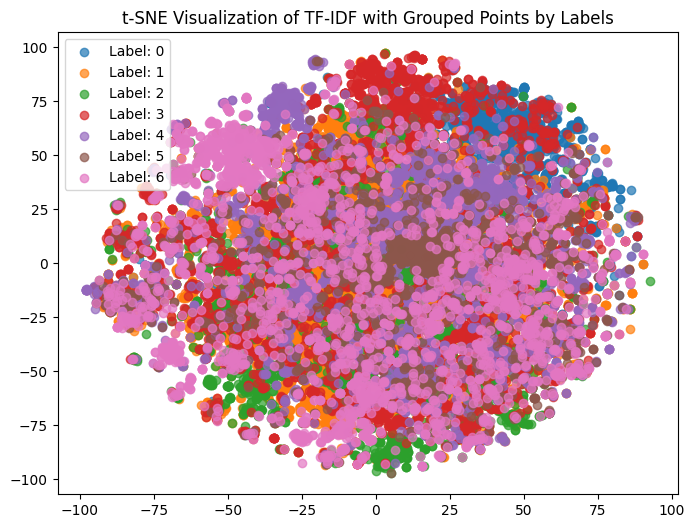

In [ ]:
import numpy as np
tfidf_matrix = tfidf.values[:,:-1]
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(tfidf_matrix)

# Step 2: Get the true labels from the DataFrame
true_labels = tfidf['labels'].values


# Step 3: Visualize with t-SNE and group points by labels
plt.figure(figsize=(8, 6))
for label in np.unique(true_labels):
    label_points = tsne_embeddings[true_labels == label]
    plt.scatter(label_points[:, 0], label_points[:, 1], label=f'Label: {label}', alpha=0.7)

plt.title('t-SNE Visualization of TF-IDF with Grouped Points by Labels')
plt.legend()
plt.show()

## bow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


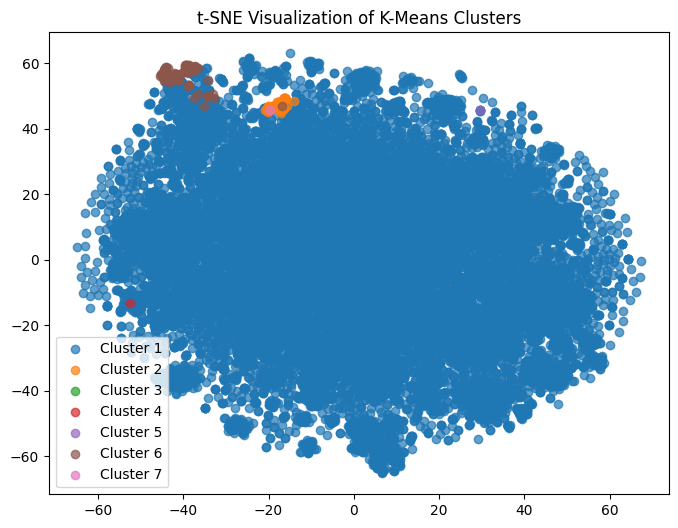

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tfidf_matrix = bow.values[:,:-1]
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(tfidf_matrix)
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(tfidf_matrix)

plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    cluster_points = tsne_embeddings[kmeans_clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}', alpha=0.7)

plt.title('t-SNE Visualization of K-Means Clusters')
plt.legend()
plt.show()

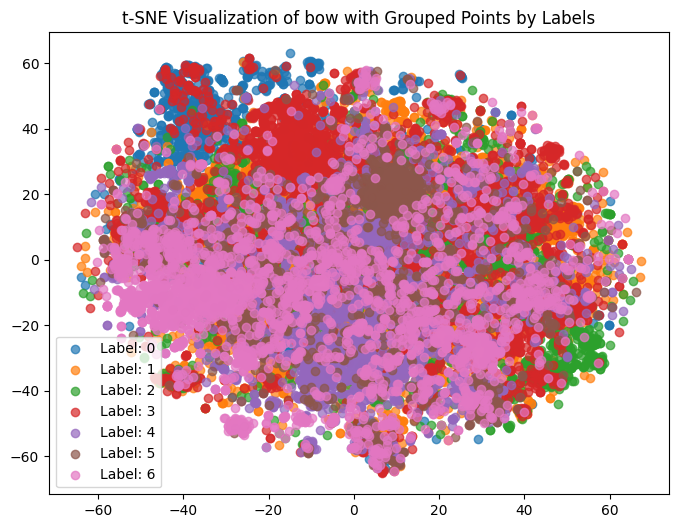

In [ ]:
import numpy as np
tfidf_matrix = bow.values[:,:-1]
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(tfidf_matrix)

# Step 2: Get the true labels from the DataFrame
true_labels = bow['labels'].values

# Step 3: Visualize with t-SNE and group points by labels
plt.figure(figsize=(8, 6))
for label in np.unique(true_labels):
    label_points = tsne_embeddings[true_labels == label]
    plt.scatter(label_points[:, 0], label_points[:, 1], label=f'Label: {label}', alpha=0.7)

plt.title('t-SNE Visualization of bow with Grouped Points by Labels')
plt.legend()
plt.show()

Now lets look at the breakdown of the labels to the clustering class

121

# Supervised

##Models just with tfidf

In [ ]:
import numpy as np
import pandas as pd
import pycaret.classification as pc


Here I'm using pycaret it's a python module that has multiple cool features, like a ton of models to compare that you can filter based on metric. It also prepares our data, by imputing any missing values with the mean and encodes are label

In [ ]:
models_to_compare = ['lr', 'rf', 'nb']
models = clf.compare_models(include=models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8450,0.9745,0.8450,0.8549,0.8463,0.8142,0.8160,59.1330
rf,Random Forest Classifier,0.8424,0.9717,0.8424,0.8586,0.8431,0.8108,0.8145,24.8330
nb,Naive Bayes,0.5274,0.7244,0.5274,0.5498,0.5328,0.4425,0.4446,10.6880


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
rf_classification = clf.create_model('rf')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:37:00
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_tuned = clf.tune_model(rf_classification, )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:52:17
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


84 % and insert {lift} is great and it does well on unseen data, however lets remember that the number of features is a lot and lets imagine the computional ressource it may take it we had more tags or more questions so let's go and look at other approaches, and try and to get better and similar accuracy and F1 and less computionally expensive

In [ ]:
import pickle

with open('drive/MyDrive/stack_overflow_NLP/fine_tuned_tfid_model.pkl', 'wb') as file:
    pickle.dump(rf_tuned, file)


## Word2vec
Word2vec is deep learning word embedding, that become features for our models,  wich mean it translates words into vectors, and the idea is that learn to make sure that words that appear in the same context have vectors with similar values. Because the corpus is pretty small lets set the num of features to 100

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
body_corpus = []
title_corpus = []
corpus_tags= []
for i, label, j in zip(top_tags['body_sentence_dl'],top_tags['Tags'], top_tags['Title_sentence_dl']):
 title_corpus.append(word_tokenize(str(j)))
 body_corpus.append(word_tokenize(str(i)))
 corpus_tags.append(label)


Here we train word2vec on our title and body using CBOW for the title because the voc will be less precise and have less rare words, and skipgram for the body to capture relationships between rarer words because skip gram is trained to predict the context of a word

In [ ]:
model_title = Word2Vec(title_corpus, vector_size = 100, window=5, min_count=1, workers =4, sg = 0)
model_body = Word2Vec(body_corpus, vector_size=200, window=5, min_count=1, workers =4, sg  = 1)

In [ ]:
body_embeddings = []
for i in body_corpus:

  words_in_vocab = [word for word in i if word in model_body.wv]

  mean_vector = sum([model_body.wv[word] for word in words_in_vocab]) / len(words_in_vocab)

  body_embeddings.append(mean_vector.tolist())


In [ ]:
title_embeddings = []
for i in title_corpus:

  words_in_vocab = [word for word in i if word in model_title.wv]

  mean_vector = sum([model_title.wv[word] for word in words_in_vocab]) / len(words_in_vocab)

  title_embeddings.append(mean_vector.tolist())


In [ ]:
model_body.save('drive/MyDrive/stack_overflow_NLP/model_wv_body.bin')


In [ ]:
model_title.save('drive/MyDrive/stack_overflow_NLP/model_wv_title.bin')

In [ ]:
import numpy as np

title_embeddings_matrix = np.stack(title_embeddings)
body_embeddings_matrix = np.stack(body_embeddings)

In [ ]:
title_embeddings_matrix.shape
body_embeddings_matrix.shape

(23105, 200)

In [ ]:
np.concatenate((title_embeddings_matrix, body_embeddings_matrix), axis = 1).shape

(23105, 300)

In [ ]:
X = np.concatenate((title_embeddings_matrix, body_embeddings_matrix), axis = 1)


In [ ]:
Y = corpus_tags

In [ ]:
X.shape

(23105, 300)

#Models with word2vec and tfidf
Let's do a model with word2vec and just 1000 features for tfidf with bigrams

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
max_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
# Fit and transform the combined_text using TF-IDF vectorizer
tfidf_features_combined = tfidf_vectorizer.fit_transform(top_tags['combined_text'])
tfidf_values = tfidf_features_combined.toarray()


NameError: ignored

In [ ]:
import pickle
vectorizer_file_path = "drive/MyDrive/stack_overflow_NLP/tfidf_vectorizer_for_tfidfword2vec.pkl"

with open(vectorizer_file_path, "wb") as file:
    pickle.dump(tfidf_vectorizer, file)

In [ ]:
tfidf_values.shape

(23105, 1000)

In [ ]:
X = np.concatenate((X, tfidf_values), axis = 1)


In [ ]:
X.shape

(23105, 1300)

In [ ]:
np.save('drive/MyDrive/stack_overflow_NLP/tfidf_word2vecfeatures.np', X)

In [ ]:
np.save('drive/MyDrive/stack_overflow_NLP/tfidf_word2vectarget.np', Y)

In [ ]:
import pycaret.classification as pc


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25)


# Initialize the classification model.
clf = pc.setup(data=X_train, target=y_train)

,Description,Value
0,Session id,5668
1,Target,target
2,Target type,Multiclass
3,Target mapping,"android: 0, c#: 1, c++: 2, java: 3, javascript: 4, php: 5, python: 6"
4,Original data shape,"(17328, 1301)"
5,Transformed data shape,"(17328, 1301)"
6,Transformed train set shape,"(12129, 1301)"
7,Transformed test set shape,"(5199, 1301)"
8,Numeric features,1300
9,Preprocess,True


In [ ]:
clf.get_config('variables')

In [ ]:
display(clf)

In [ ]:
models_to_compare = ['lr', 'rf', 'nb']
models = clf.compare_models(include = models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8348,0.9706,0.8348,0.8386,0.8352,0.8025,0.8032,18.5780
rf,Random Forest Classifier,0.7985,0.9558,0.7985,0.8096,0.7992,0.7582,0.7605,7.9060
nb,Naive Bayes,0.5387,0.8603,0.5387,0.6574,0.5399,0.4677,0.4876,0.4730


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
import pickle

with open('drive/MyDrive/stack_overflow_NLP/word2vec_tfid_model.pkl', 'wb') as file:
    pickle.dump(models, file)

In [ ]:
model = clf.tune_model(models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8566,0.9728,0.8566,0.8599,0.8567,0.8296,0.8301
1,0.8293,0.9733,0.8293,0.8326,0.8302,0.7970,0.7972
2,0.8277,0.9674,0.8277,0.8311,0.8281,0.7954,0.7959
3,0.8557,0.9747,0.8557,0.8573,0.8557,0.8285,0.8288
4,0.8491,0.9721,0.8491,0.8500,0.8487,0.8205,0.8208
5,0.8392,0.9690,0.8392,0.8411,0.8393,0.8091,0.8094
6,0.8277,0.9689,0.8277,0.8291,0.8278,0.7950,0.7952
7,0.8458,0.9715,0.8458,0.8469,0.8460,0.8166,0.8168
8,0.8219,0.9671,0.8219,0.8253,0.8221,0.7886,0.7892


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
import pickle

with open('drive/MyDrive/stack_overflow_NLP/fine_tuned_word2vec_tfid_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
print("imported tuned model")

imported tuned model


In [ ]:
clf.evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Dealing with class imbalance to try because looking at our AUC curve
 and improve

Here is the moment I figured I did not know what the encoding for each label was so here is me trying to figure that out. Later on it look like it may be by alphabetic order but it also worth checking

In [ ]:


data = clf.get_config('dataset')
data_encoded = clf.get_config('dataset_transformed')

False

In [ ]:
data['target'].unique()


['c#', 'python', 'android', 'c++', 'javascript', 'java', 'php']
Categories (7, object): ['android', 'c#', 'c++', 'java', 'javascript', 'php', 'python']

In [ ]:
data.head(20)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_2392,feature_2393,feature_2394,feature_2395,feature_2396,feature_2397,feature_2398,feature_2399,feature_2400,target
15940,0.038734,-0.135300,-0.044423,0.127990,0.057666,-0.098228,0.001451,0.307100,-0.086087,0.272220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c#
13688,0.021858,0.006578,-0.001120,0.038547,0.184876,-0.040266,-0.057984,0.206673,-0.060047,0.186531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,python
14392,0.028767,-0.031042,0.026663,0.058497,0.133328,-0.107910,-0.049193,0.214979,-0.055909,0.184521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,android
8768,0.120801,-0.073688,0.006390,-0.043404,0.187809,-0.070304,-0.056215,0.244288,-0.020279,0.153566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c++
16356,0.035487,-0.099398,0.010383,0.086730,0.070226,-0.179956,-0.054073,0.254103,-0.055423,0.205868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,android


In [ ]:
df_encoded = pd.DataFrame(data_encoded['target'].value_counts()).reset_index()

In [ ]:
df_decoded = pd.DataFrame(data['target'].value_counts()).reset_index()

In [ ]:
df_decoded.head()

,index,target
0,c#,3866
1,java,3335
2,javascript,2767
3,python,2504
4,c++,1976


In [ ]:
classes_decoded = pd.merge(df_encoded, df_decoded, on = 'target')

In [ ]:
classes_decoded.rename(columns={
    'index_x': 'encoding',
    'target': 'num',
    'index_y': 'classes'
}, inplace=True)

In [ ]:
display(classes_decoded)

,encoding,num,classes
0,1,3866,c#
1,3,3335,java
2,4,2767,javascript
3,6,2504,python
4,2,1976,c++
5,5,1582,php
6,0,1298,android



# Getting bert embeddings and applying classification


In [ ]:
!nvidia-smi

Sat Aug 26 17:34:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 70.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
top_tags = pd.read_csv('drive/MyDrive/stack_overflow_NLP/data_with_word2vec.csv')

In [ ]:
df = top_tags[['Body', 'Title', 'Tags']]

In [ ]:
df.head()

,Body,Title,Tags
0,I have an Object that is being marshalled to X...,"Can I force JAXB not to convert "" into "", for ...",java
1,I have already read various accounts of Clojur...,On Performance and Java Interoperability: Cloj...,java
2,\nPossible Duplicate:\nBuilding a subset of bo...,How can I use just one boost library/file?,c++
3,Once you have learned the basic commands in Py...,How do I get fluent in Python?,python
4,Is it considered bad form to raise exceptions ...,Python: Is it bad form to raise exceptions wit...,python


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
lencoder = LabelEncoder()

In [ ]:
# Reverse label encoding
#label_encoder = LabelEncoder()
#decoded_labels = label_encoder.inverse_transform(encoded_labels)

In [ ]:
df['Tag_encoded'] = lencoder.fit_transform(df['Tags'])

<ipython-input-10-2f762909f0be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tag_encoded'] = lencoder.fit_transform(df['Tags'])


In [ ]:
unique_tags = [tags for tags in df['Tag_encoded'].unique()]
encoded_tags = lencoder.inverse_transform(unique_tags)

In [ ]:
print(unique_tags)
print(encoded_tags)

[3, 2, 6, 4, 1, 5, 0]
['java' 'c++' 'python' 'javascript' 'c#' 'php' 'android']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[['Body', 'Title']], df['Tag_encoded'], random_state=42, test_size=0.2)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

device = torch.device("cuda")

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

<Axes: >

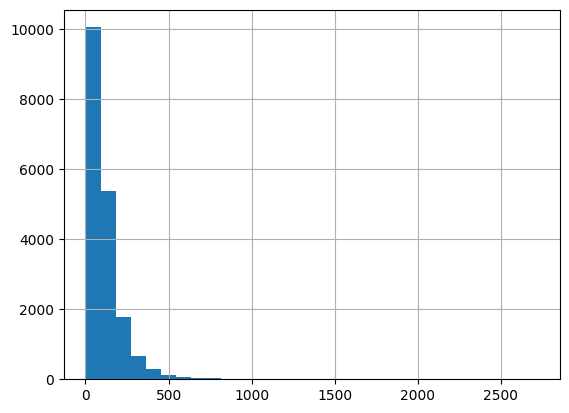

In [ ]:
seq_len = [len(i.split()) for i in X_train['Body']]
pd.Series(seq_len).hist(bins=30)

In [ ]:
max_len = 250

In [ ]:
tokens_train_body = tokenizer.batch_encode_plus(X_train['Body'].tolist(),
                                                max_length= max_len,
                                                padding='longest',
                                                truncation = True,
                                                return_token_type_ids=False)



In [ ]:
tokens_val_body = tokenizer.batch_encode_plus(X_val['Body'].tolist(),
                                                max_length= max_len,
                                                padding='longest',
                                                truncation = True,
                                                return_token_type_ids=False)


<Axes: >

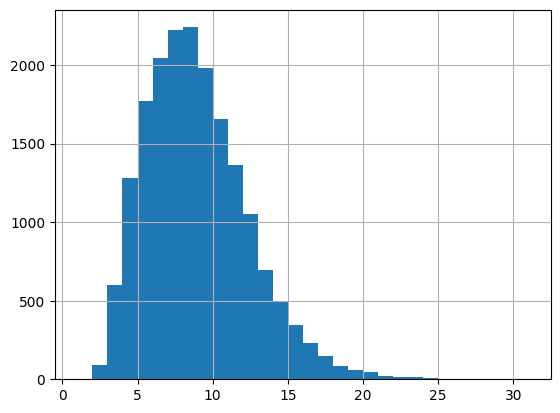

In [ ]:
seq_len = [len(i.split()) for i in X_train['Title']]
pd.Series(seq_len).hist(bins=30)

In [ ]:
tokens_train_title = tokenizer.batch_encode_plus(X_train['Title'].tolist(),
                                                max_length= 10,
                                                padding='longest',
                                                truncation = True,
                                                return_token_type_ids=False)

In [ ]:
tokens_val_title = tokenizer.batch_encode_plus(X_val['Title'].tolist(),
                                                max_length= 10,
                                                padding='longest',
                                                truncation = True,
                                                return_token_type_ids=False)

In [ ]:
body_train_seq = torch.tensor(tokens_train_body['input_ids'])

In [ ]:
body_train_seq.shape

torch.Size([18484, 250])

In [ ]:
title_train_seq = torch.tensor(tokens_train_title['input_ids'])

In [ ]:
torch.cat([body_train_seq, title_train_seq], dim=1).shape

torch.Size([18484, 260])

In [ ]:
train_seq = torch.cat([body_train_seq, title_train_seq], dim=1)

In [ ]:
body_train_mask = torch.tensor(tokens_train_body['attention_mask'])

In [ ]:
body_train_mask.shape

torch.Size([18484, 250])

In [ ]:
title_train_mask = torch.tensor(tokens_train_title['attention_mask'])

In [ ]:
body_val_seq = torch.tensor(tokens_val_body['input_ids'])

In [ ]:
title_val_seq = torch.tensor(tokens_val_title['input_ids'])

In [ ]:
val_seq = torch.cat([body_val_seq, title_val_seq], dim=1)

In [ ]:
body_val_mask = torch.tensor(tokens_val_body['attention_mask'])

In [ ]:
title_val_mask = torch.tensor(tokens_val_title['attention_mask'])

In [ ]:
val_mask = torch.cat([body_val_mask, title_val_mask], dim=1)

In [ ]:
val_mask = val_mask.to(torch.long)

In [ ]:
train_mask = torch.cat([body_train_mask, title_train_mask], dim=1)

In [ ]:
train_mask = train_mask.to(torch.long)

In [ ]:
train_seq = train_seq.to(torch.long)
val_seq = val_seq.to(torch.long)

In [ ]:
val_y = torch.tensor(y_val.tolist(), dtype=torch.long)

In [ ]:
train_y = torch.tensor(y_train.tolist(), dtype=torch.long)

In [ ]:
val_mask.shape

torch.Size([4621, 260])

In [ ]:
val_mask.to(device)

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0')

In [ ]:
val_y.to(device)

tensor([1, 1, 4,  ..., 1, 1, 1], device='cuda:0')

In [ ]:
val_seq.to(device)

tensor([[ 101, 1045, 2031,  ...,    0,    0,    0],
        [ 101, 1045, 2572,  ..., 4183, 1999,  102],
        [ 101, 1045, 2031,  ..., 1999, 9262,  102],
        ...,
        [ 101, 1045, 2525,  ..., 2996, 2286,  102],
        [ 101, 1045, 2052,  ..., 2013, 1996,  102],
        [ 101, 1045, 2342,  ..., 7077, 1998,  102]], device='cuda:0')

In [ ]:
train_mask = train_mask.to(device)

In [ ]:
train_y.to(device)

tensor([2, 0, 3,  ..., 3, 1, 6], device='cuda:0')

In [ ]:
train_seq = train_seq.to(device)

## Create DataLoaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 8

In [ ]:
train_data = TensorDataset(train_seq, train_mask, train_y)

In [ ]:
train_data.tensors

(tensor([[  101,  2129,  2064,  ...,     0,     0,     0],
         [  101,  1045,  2318,  ...,  2996,   102,     0],
         [  101,  1045,  2031,  ...,  2007, 16371,   102],
         ...,
         [  101,  1999,  9262,  ...,  2147,  2105,   102],
         [  101,  1045,  2031,  ...,  5646, 10281,   102],
         [  101,  2478,  1052,  ..., 18750,  1013,   102]], device='cuda:0'),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 0],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'),
 tensor([2, 0, 3,  ..., 3, 1, 6]))

In [ ]:
predict_sampler = SequentialSampler(train_data)
predict_dataloader = DataLoader(train_data, sampler=predict_sampler, batch_size=batch_size)

## Convert the data to bert encodings

In [ ]:
model = bert

In [ ]:
model.to('cuda')

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
import numpy as np
from tqdm import tqdm, tqdm_notebook

# instantiate

model.eval()
bert_output = []
tags = []

for batch in tqdm(predict_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, tag = batch
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label = tag.detach().cpu().numpy()
    first_hidden_state = logits[:,0,:]
    bert_output.append(first_hidden_state)
    tags.append(label)

 10%|█         | 239/2311 [00:32<04:39,  7.42it/s]


KeyboardInterrupt: ignored

In [ ]:
np.array(bert_output)

<ipython-input-117-036c689766d8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(bert_output).shape


(2311,)

In [ ]:
tags[-1] = np.pad(tags[-1], (0, 4), 'constant', constant_values=0)

In [ ]:
tags_list = np.vstack(tags).reshape(-1)

In [ ]:
tags_list = tags_list[:-4]

In [ ]:
tags_list.shape

(18484,)

In [ ]:
bert_features = np.vstack(bert_output)

In [ ]:
train_matrix = np.concatenate((bert_features, tags_list.reshape(18484, 1)), axis = 1)

In [ ]:
train_matrix.shape

(18484, 769)

In [ ]:
np.save('drive/MyDrive/stack_overflow_NLP/bert_train_matrix.npy', train_matrix)

## Use bert as features for classification with pycaret

## Word2vec
Word2vec is deep learning word embedding, that become features for our models,  wich mean it translates words into vectors, and the idea is that learn to make sure that words that appear in the same context have vectors with similar values. Because the corpus is pretty small lets set the num of features to 100

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
body_corpus = []
title_corpus = []
for j, i in zip(X_train['Title'],X_train['Body']):
 title_corpus.append(word_tokenize(str(j)))
 body_corpus.append(word_tokenize(str(i)))


Here we train word2vec on our title and body using CBOW for the title because the voc will be less precise and have less rare words, and skipgram for the body to capture relationships between rarer words because skip gram is trained to predict the context of a word

In [ ]:
model_title = Word2Vec(title_corpus, vector_size = 100, window=5, min_count=1, workers =4, sg = 0)
model_body = Word2Vec(body_corpus, vector_size=200, window=5, min_count=1, workers =4, sg  = 1)

In [ ]:
body_embeddings = []
for i in body_corpus:

  words_in_vocab = [word for word in i if word in model_body.wv]

  mean_vector = sum([model_body.wv[word] for word in words_in_vocab]) / len(words_in_vocab)

  body_embeddings.append(mean_vector.tolist())


In [ ]:
title_embeddings = []
for i in title_corpus:

  words_in_vocab = [word for word in i if word in model_title.wv]

  mean_vector = sum([model_title.wv[word] for word in words_in_vocab]) / len(words_in_vocab)

  title_embeddings.append(mean_vector.tolist())


In [ ]:
import numpy as np

title_embeddings_matrix = np.stack(title_embeddings)
body_embeddings_matrix = np.stack(body_embeddings)

In [ ]:
title_embeddings_matrix.shape
body_embeddings_matrix.shape

(18484, 200)

In [ ]:
np.concatenate((title_embeddings_matrix, body_embeddings_matrix), axis = 1).shape

(18484, 300)

In [ ]:
X = np.concatenate((title_embeddings_matrix, body_embeddings_matrix), axis = 1)


In [ ]:
X.shape

(23105, 300)

In [ ]:
features = np.load('drive/MyDrive/stack_overflow_NLP/bert_train_matrix.npy')

In [ ]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 82.1 MB/s eta 

In [ ]:
import pycaret.classification as pc

In [ ]:
models_to_compare = ['lr', 'rf', 'nb']
models = clf.compare_models(include = models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7106,0.9284,0.7106,0.7130,0.7111,0.6547,0.6550,11.6370
rf,Random Forest Classifier,0.4904,0.8104,0.4904,0.5497,0.4823,0.3763,0.3891,6.1770
nb,Naive Bayes,0.4024,0.7708,0.4024,0.4246,0.3839,0.3076,0.3158,0.1490


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
clf = pc.setup(data=features[:, :-1], target=features[:, -1])

,Description,Value
0,Session id,877
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(18484, 769)"
4,Transformed data shape,"(18484, 769)"
5,Transformed train set shape,"(12938, 769)"
6,Transformed test set shape,"(5546, 769)"
7,Numeric features,768
8,Preprocess,True
9,Imputation type,simple


In [ ]:
X_train

,Body,Title
6545,how can I convert any object of my own class c...,Convert into void*
16031,I started using new Android Studio and cant fi...,Apk location in New Android Studio
4015,I have a string which contains alphanumeric ch...,How to check a string starts with numeric number?
4453,How do I read an entire InputStream into a byt...,Convert InputStream to byte array in Java
11356,Yesterday API 19 came out so I upgraded SDK an...,Google Play Services update
...,...,...
11964,I am starting to use some Java code which was ...,Eclipse : list methods and variables of all cl...
21575,From the training set I took a image('img') of...,Why CIFAR-10 images are not displayed properly...
5390,"In Java, there is no such thing as an unsigned...",What is the best way to work around the fact t...
860,"I have two DataTables, A and B, produced from ...",Compare two DataTables to determine rows in on...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

max_features = 500
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
# Fit and transform the combined_text using TF-IDF vectorizer
tfidf_features_combined = tfidf_vectorizer.fit_transform(X_train['Title'])
tfidf_values = tfidf_features_combined.toarray()


In [ ]:
tfidf_values.shape

(18484, 300)

In [ ]:
bert_tfidf_word2vec = np.concatenate((features[:,:-1], tfidf_values, X), axis = 1)

In [ ]:
bert_tfidf_word2vec.shape

(18484, 1368)

In [ ]:
clf = pc.setup(bert_tfidf_word2vec, target=features[:, -1])

,Description,Value
0,Session id,1358
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(18484, 1569)"
4,Transformed data shape,"(18484, 1569)"
5,Transformed train set shape,"(12938, 1569)"
6,Transformed test set shape,"(5546, 1569)"
7,Numeric features,1568
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8228,0.9712,0.8228,0.8241,0.8228,0.7886,0.7888,22.9730
rf,Random Forest Classifier,0.7173,0.9301,0.7173,0.7359,0.7167,0.6596,0.6625,6.9100
nb,Naive Bayes,0.3732,0.7998,0.3732,0.6119,0.3541,0.2940,0.3248,0.2630


Processing:   0%|          | 0/17 [00:00<?, ?it/s]